In [25]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
dfs = [
    ("15s",  pd.read_csv("breathing_rate_15s.csv")),
    ("30s",  pd.read_csv("breathing_rate_30s.csv")),
    ("60s",  pd.read_csv("breathing_rate_60s.csv")),
    ("120s", pd.read_csv("breathing_rate_120s.csv")),
    ("240s", pd.read_csv("breathing_rate_240s.csv")),
]

In [27]:
for label, df in [("15s", df15), ("30s", df30), ("60s", df60), ("120s", df120), ("240s", df240)]:
    print(f"{label}:\n{df.isna().sum()}\n")

15s:
time    0
bpm     3
dtype: int64

30s:
time    0
bpm     0
dtype: int64

60s:
time    0
bpm     0
dtype: int64

120s:
time    0
bpm     0
dtype: int64

240s:
time    0
bpm     0
dtype: int64



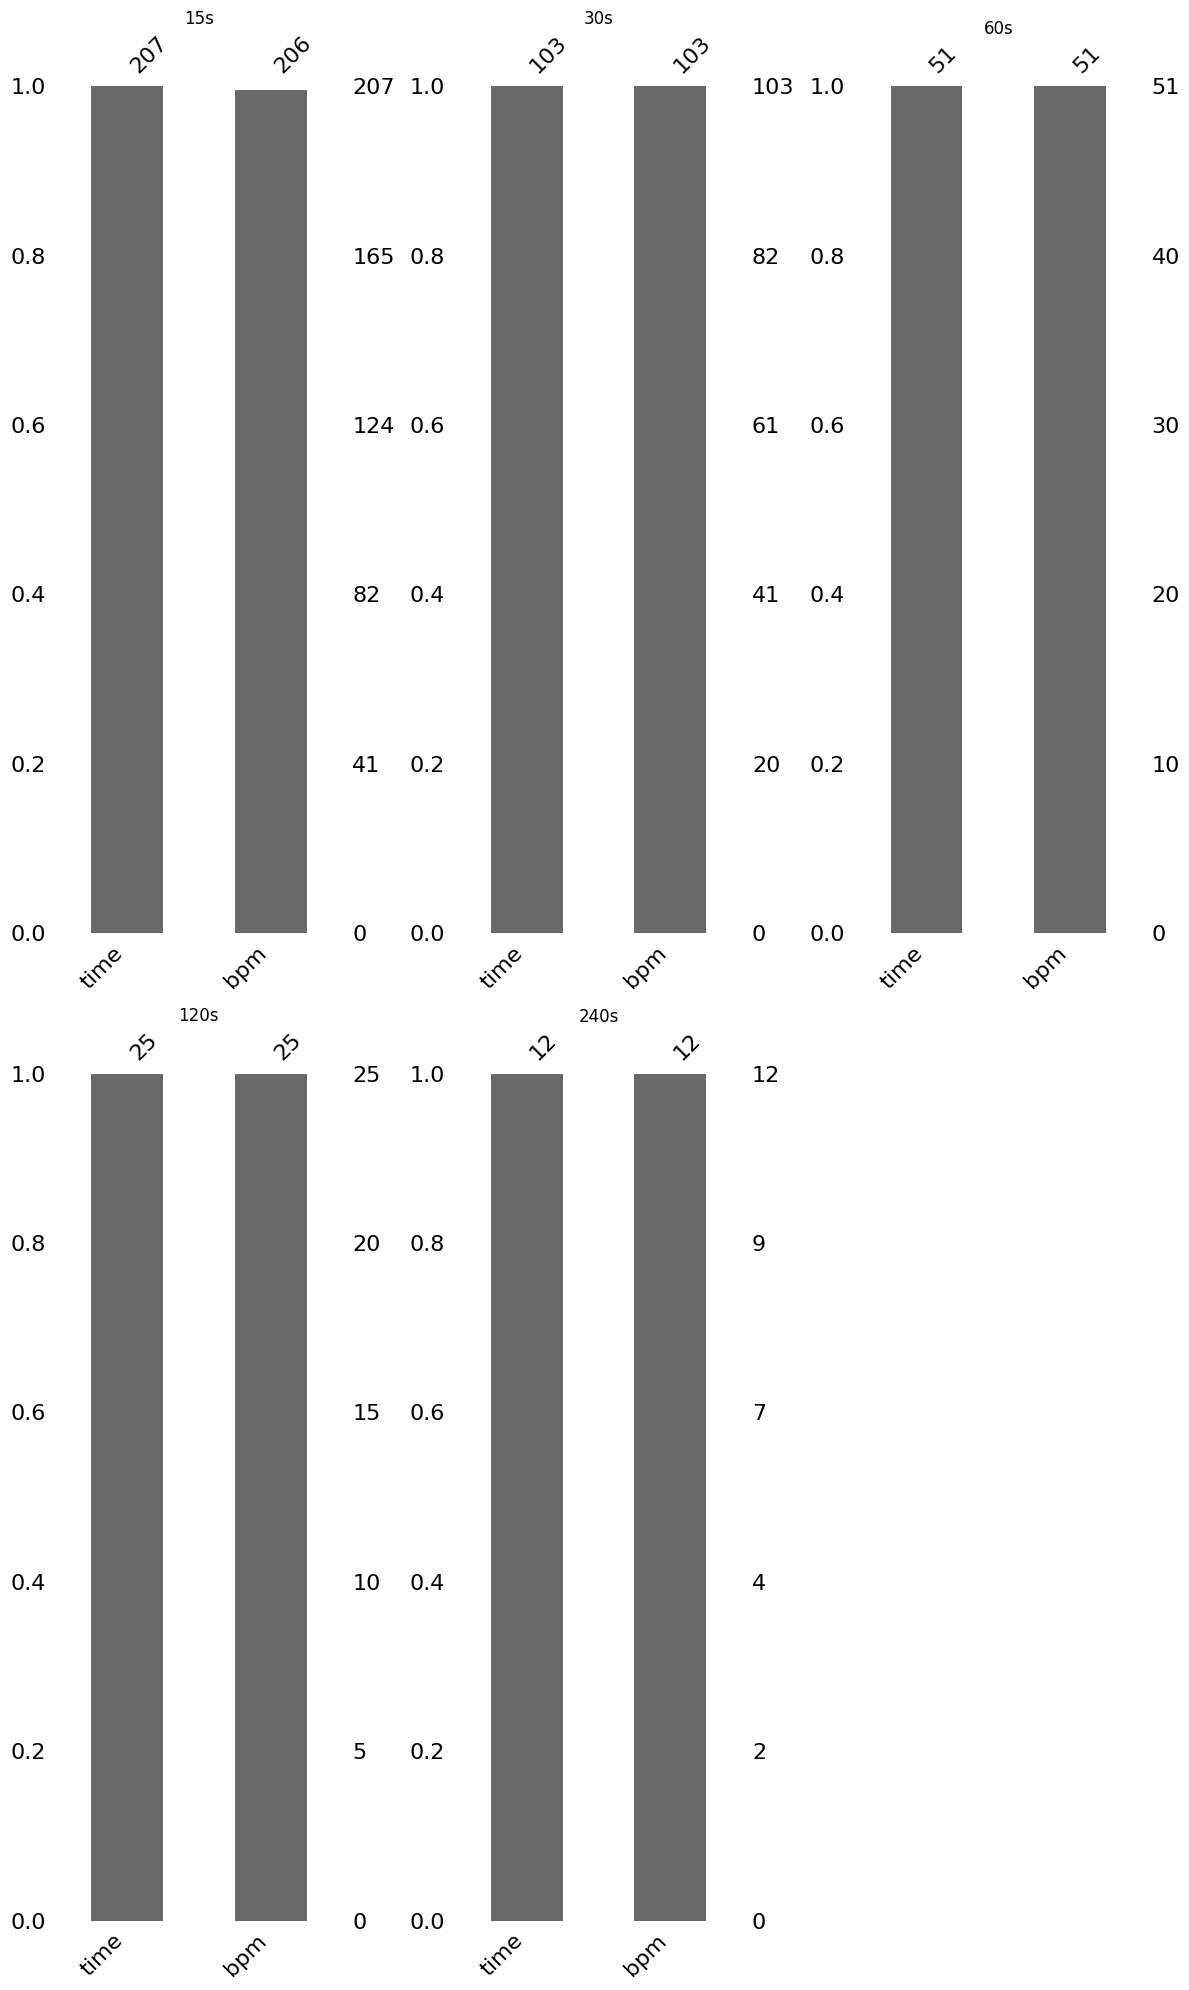

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(12, 20))
axes = axes.flatten()

for ax, (label, df) in zip(axes, dfs):
    msno.bar(df, ax=ax)
    ax.set_title(label)

# Hide the unused 6th subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [29]:
for label, df in [("15s", df15), ("30s", df30), ("60s", df60), ("120s", df120), ("240s", df240)]:
    print(f"{label}:\n{df.describe()}\n")

15s:
              bpm
count  204.000000
mean    10.019608
std      3.692571
min      8.000000
25%      8.000000
50%      8.000000
75%     12.000000
max     28.000000

30s:
              bpm
count  103.000000
mean     8.640777
std      3.922920
min      6.000000
25%      6.000000
50%      8.000000
75%     10.000000
max     30.000000

60s:
             bpm
count  51.000000
mean    8.352941
std     2.696839
min     6.000000
25%     6.000000
50%     7.000000
75%     9.000000
max    15.000000

120s:
             bpm
count  25.000000
mean    8.520000
std     2.924323
min     6.000000
25%     6.500000
50%     7.500000
75%     9.000000
max    15.000000

240s:
             bpm
count  12.000000
mean    7.533333
std     1.649977
min     6.000000
25%     6.600000
50%     7.350000
75%     7.550000
max    12.000000



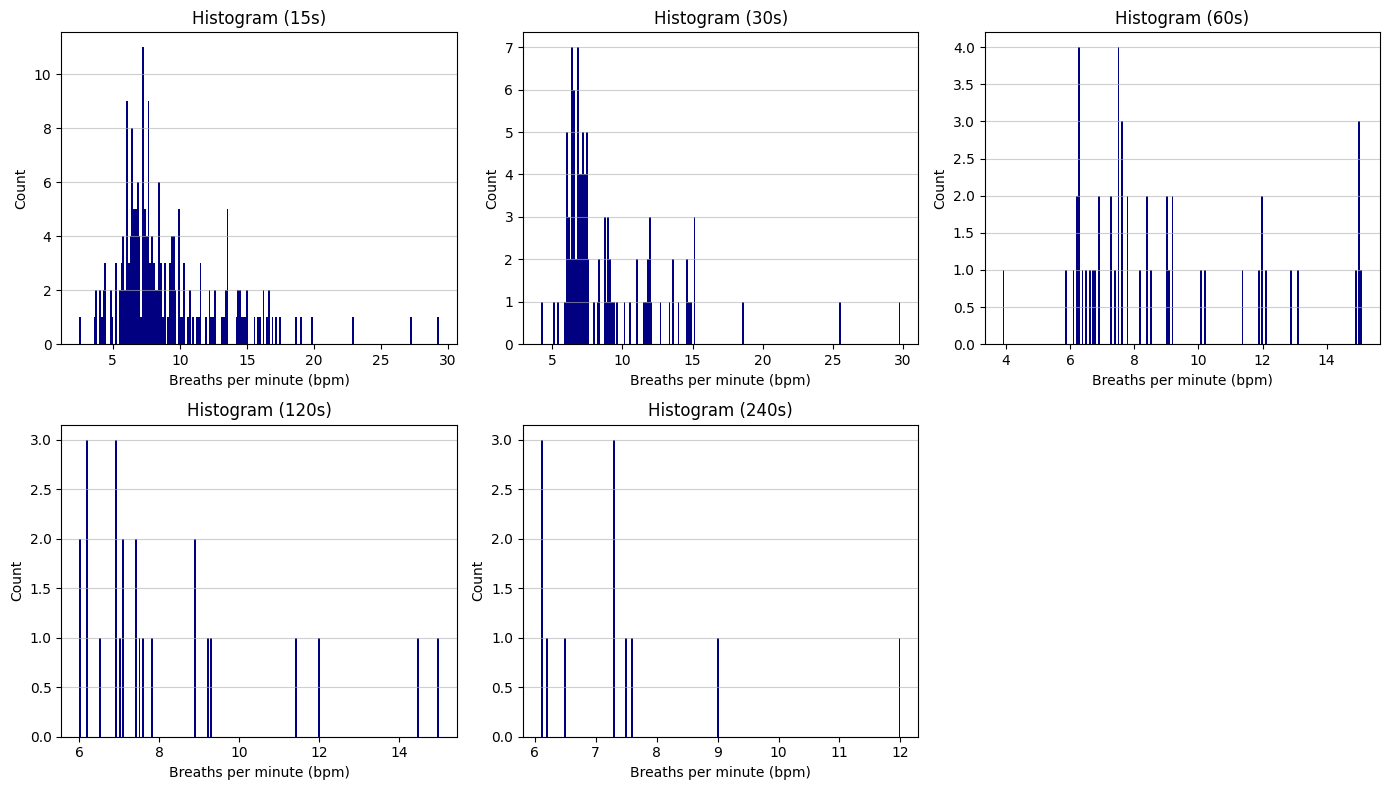

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

for ax, (label, df) in zip(axes, dfs):
    bpm = df['bpm'].dropna()
    bins = 200
    ax.hist(bpm, bins=bins, color='navy')
    ax.set_xlabel('Breaths per minute (bpm)')
    ax.set_ylabel('Count')
    ax.set_title(f'Histogram ({label})')
    ax.grid(axis='y', alpha=0.6)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [31]:
for label, df in dfs:
    bpm = df['bpm'].dropna().to_numpy()
    uniq = np.sort(np.unique(bpm))
    diffs = np.unique(np.round(np.diff(uniq), 6))
    print(f"{label}: unique step sizes {diffs[:8]} ...  (n uniq={len(uniq)})")


15s: unique step sizes [0.1 0.2 0.3 0.5 0.6 0.9 1.2 2.1] ...  (n uniq=104)
30s: unique step sizes [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.9] ...  (n uniq=53)
60s: unique step sizes [0.1 0.2 0.4 0.5 0.8 0.9 1.2 1.8] ...  (n uniq=33)
120s: unique step sizes [0.1 0.2 0.3 0.4 0.5 0.6 1.1 2.1] ...  (n uniq=17)
240s: unique step sizes [0.1 0.2 0.3 0.8 1.4 3. ] ...  (n uniq=8)
